In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
train = pd.read_csv("/content/archive (8) (1).zip")

In [39]:
train.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [40]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [41]:
train.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [42]:
train.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,object
DAYS_SINCE_LASTORDER,int64
STATUS,object
PRODUCTLINE,object
MSRP,int64


In [43]:
num_column = train.select_dtypes(include=['number']).columns
print(num_column.tolist())

['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']


In [44]:
cat_column = train.select_dtypes(include=['object']).columns
print(cat_column.tolist())

['ORDERDATE', 'STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']


In [45]:
train.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
DAYS_SINCE_LASTORDER,0
STATUS,0
PRODUCTLINE,0
MSRP,0


In [46]:
train.duplicated().sum()

0

In [47]:
train.shape

(2747, 20)

In [48]:
train.nunique()

,0
ORDERNUMBER,298
QUANTITYORDERED,58
PRICEEACH,1843
ORDERLINENUMBER,18
SALES,2690
ORDERDATE,246
DAYS_SINCE_LASTORDER,1832
STATUS,6
PRODUCTLINE,7
MSRP,80


<Axes: xlabel='DEALSIZE', ylabel='count'>

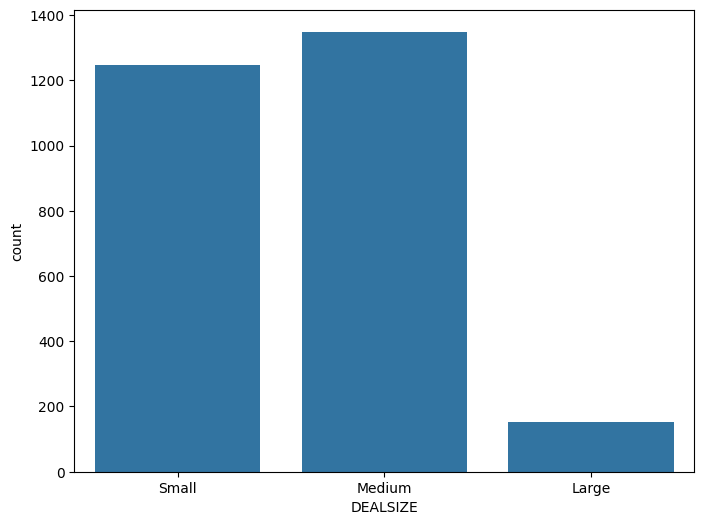

In [49]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='DEALSIZE', data=train)

Text(0.5, 1.0, 'Order Status Distribution')

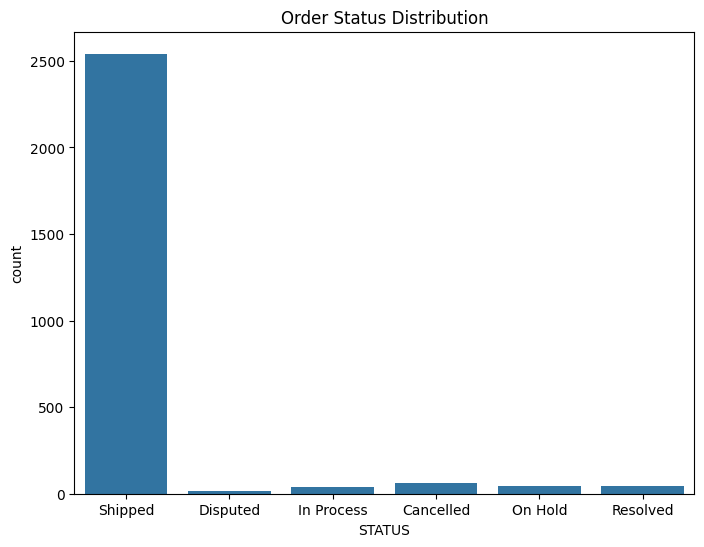

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x='STATUS', data=train)
plt.title('Order Status Distribution')

Text(0.5, 1.0, 'Product Line Distribution')

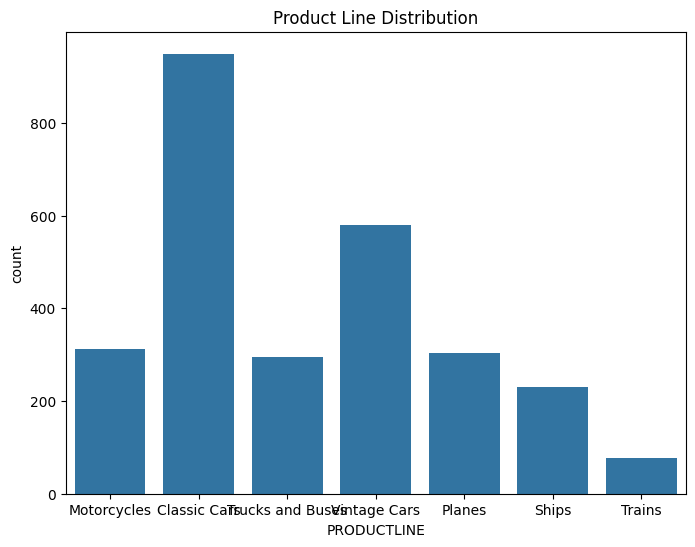

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PRODUCTLINE', data=train)
plt.title('Product Line Distribution')

Text(0.5, 1.0, 'Country-wise Orders')

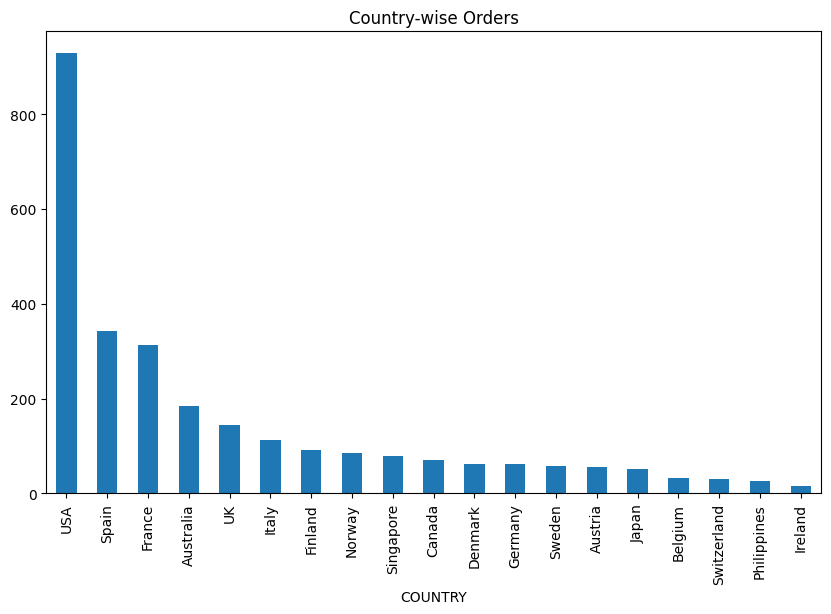

In [52]:
plt.figure(figsize=(10, 6))
train['COUNTRY'].value_counts().plot(kind='bar')
plt.title('Country-wise Orders')

Text(0.5, 1.0, 'Top 10 Cities by Order Count')

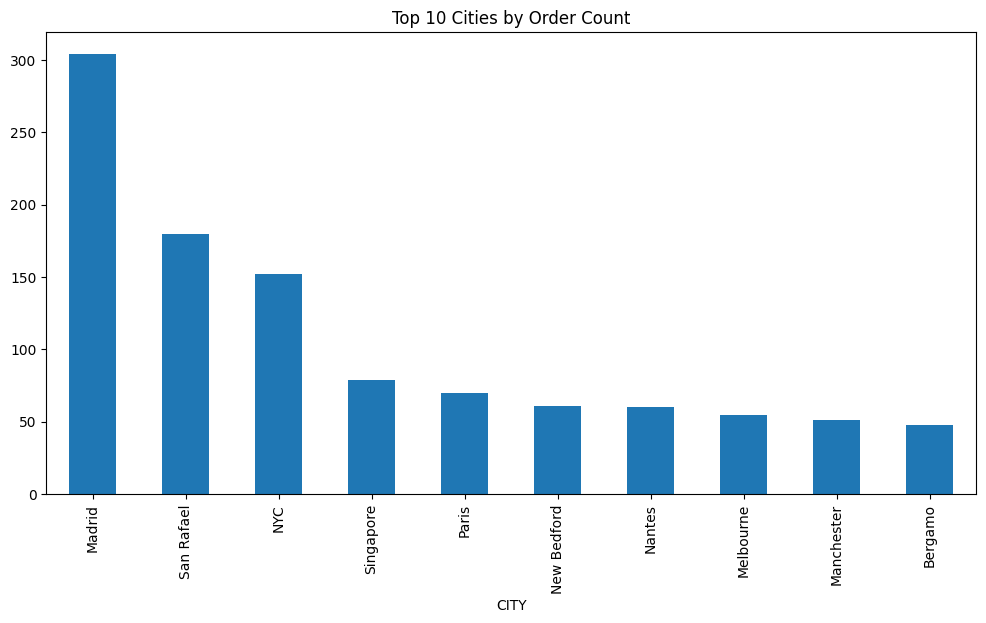

In [53]:
plt.figure(figsize=(12, 6))
train['CITY'].value_counts().nlargest(10).plot(kind='bar')  # Top 10 cities
plt.title('Top 10 Cities by Order Count')

Text(0.5, 0.98, 'Distribution of Numerical Columns')

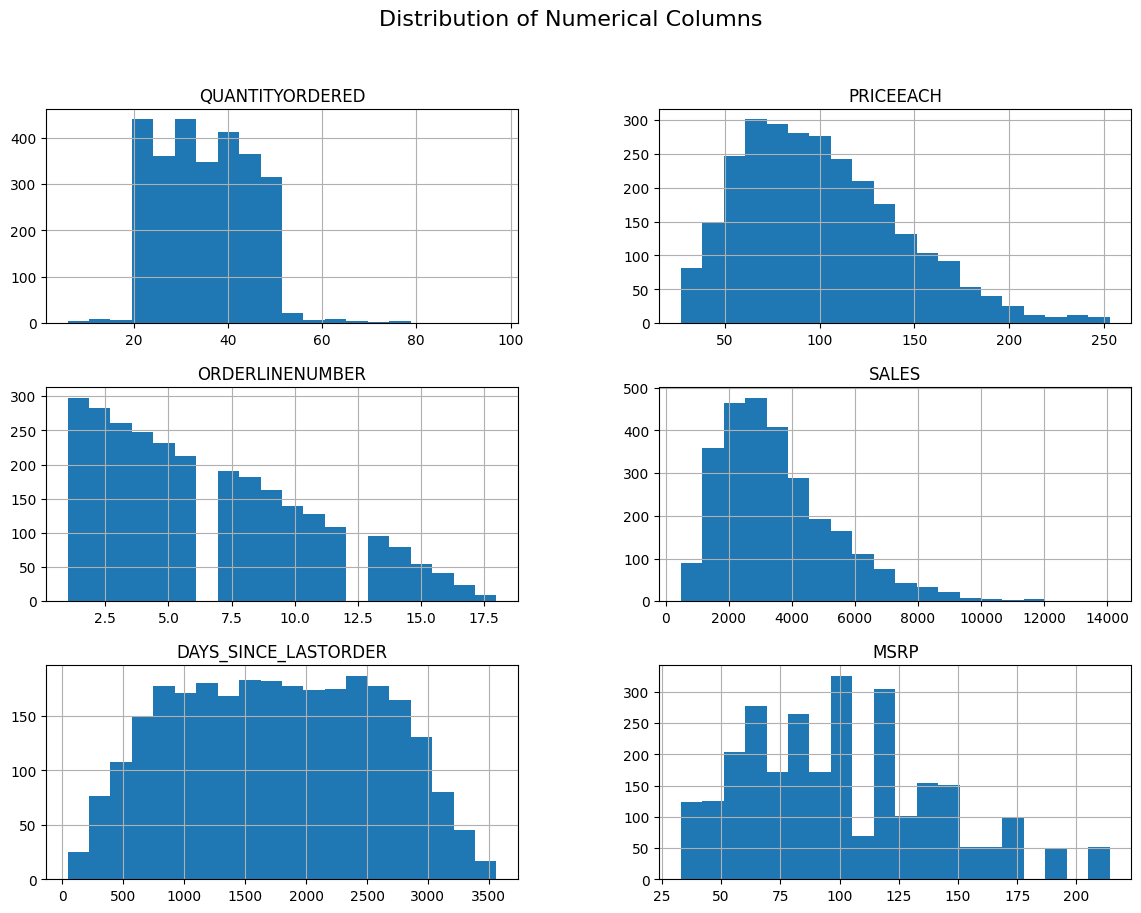

In [54]:
import matplotlib.pyplot as plt
numerical_columns = ['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']


train[numerical_columns].hist(bins=20, figsize=(14, 10), layout=(3, 2))
plt.suptitle('Distribution of Numerical Columns', size=16)

Text(0.5, 0.98, 'Pair Plot of Numerical Columns')

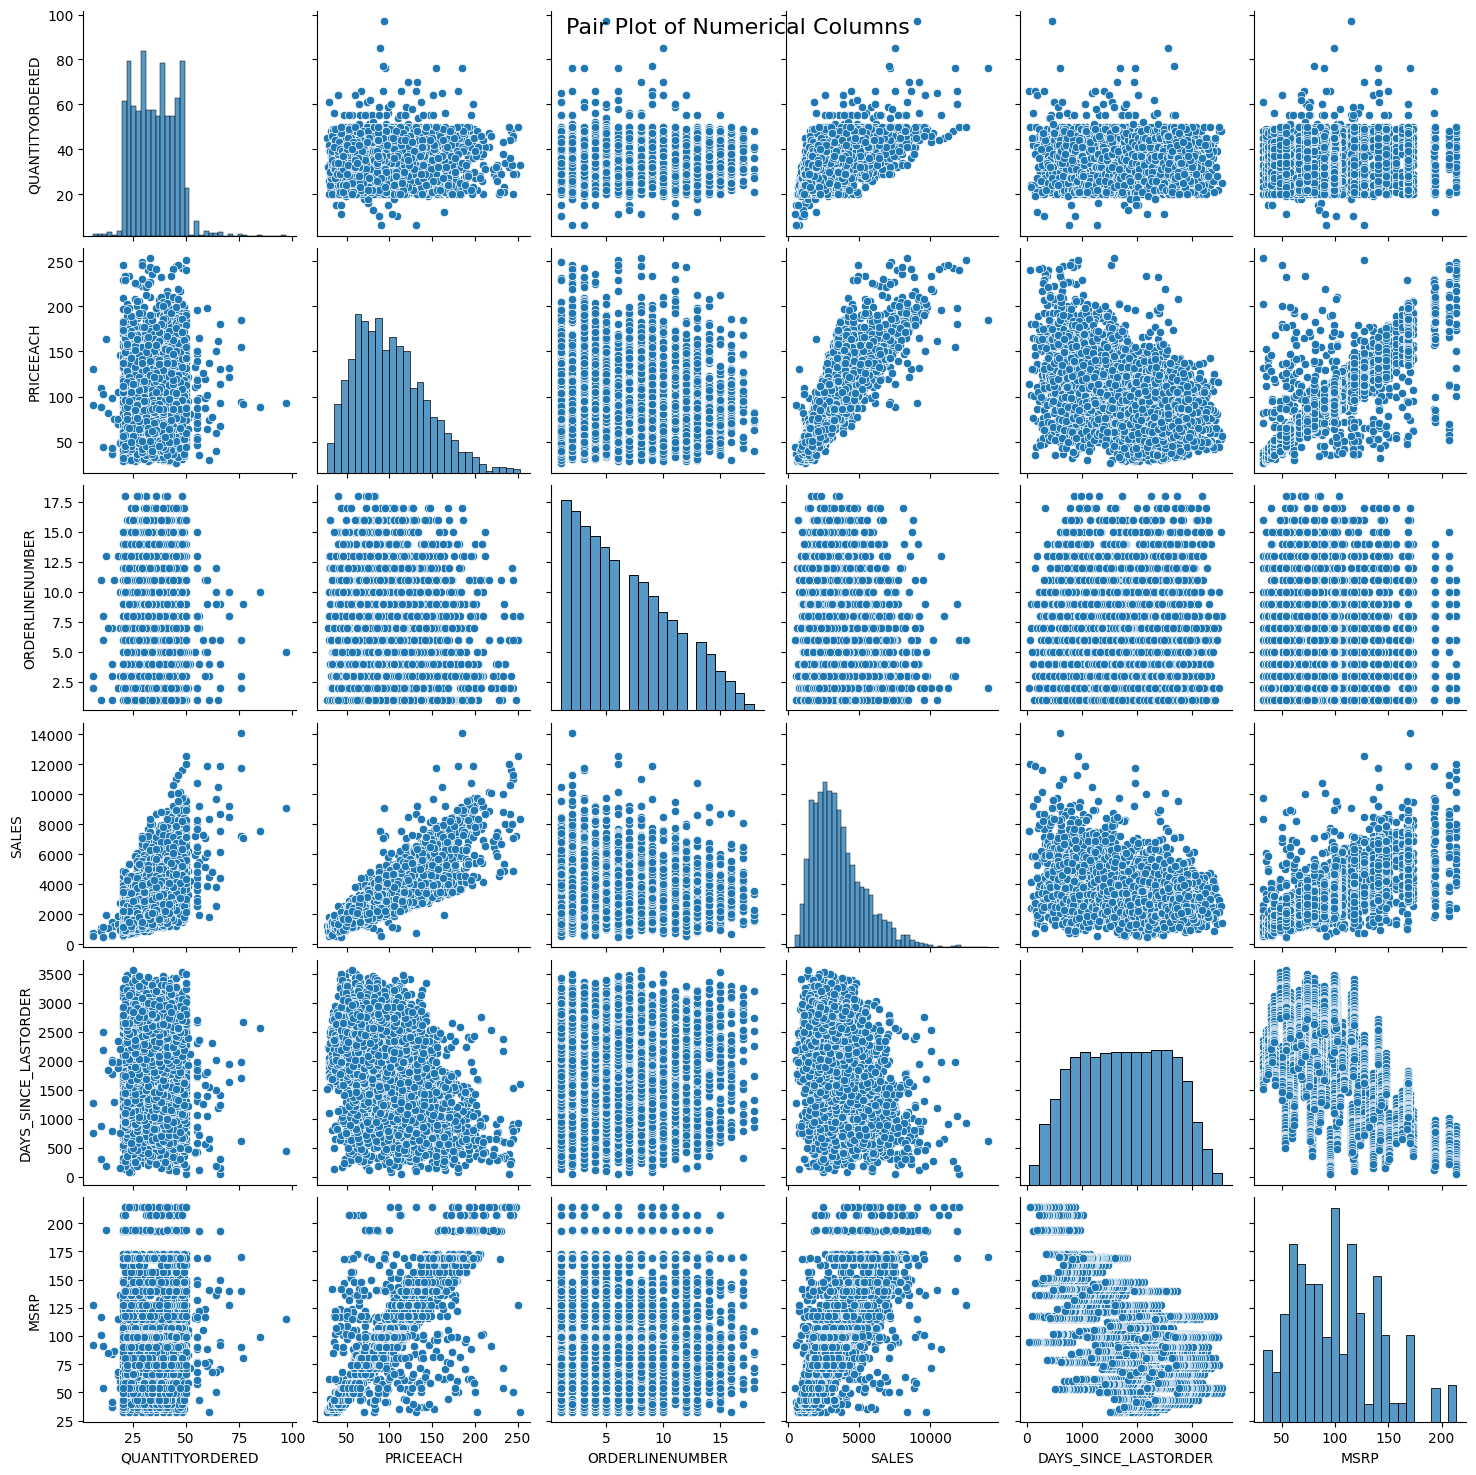

In [55]:
sns.pairplot(train[numerical_columns])
plt.suptitle('Pair Plot of Numerical Columns', size=16)

<Axes: >

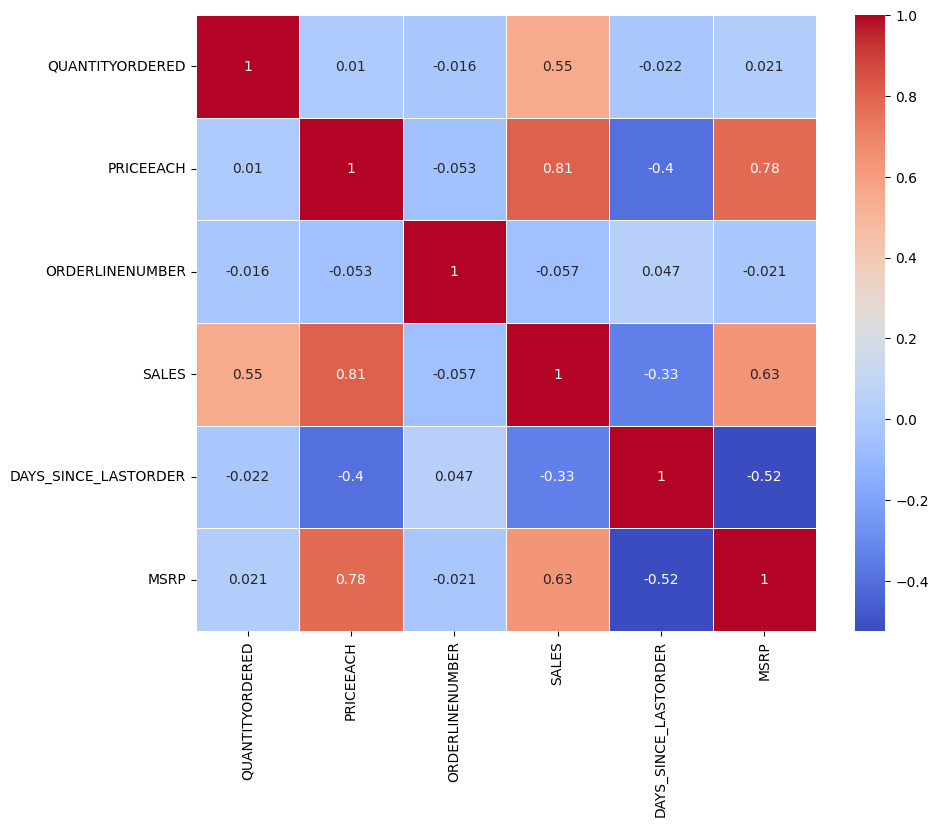

In [56]:
plt.figure(figsize=(10, 8))
corr_matrix = train[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

As it can be seen that there is a high correlation between the sales and price
It is also seen that sales is mainly dependent on Quantity ordered and price
Days since last ordered is not affecting in any manner

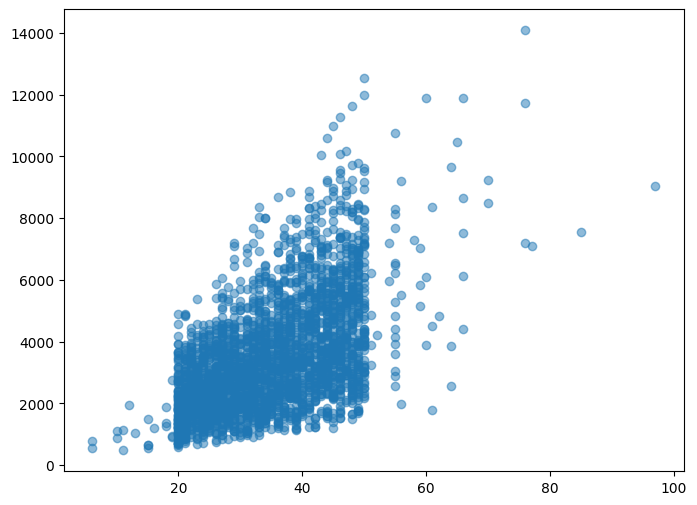

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(train['QUANTITYORDERED'], train['SALES'], alpha=0.5)

It is seen that quantity ordered is mainly between 20 to 50

Text(0.5, 1.0, 'Box Plot of Numerical Columns')

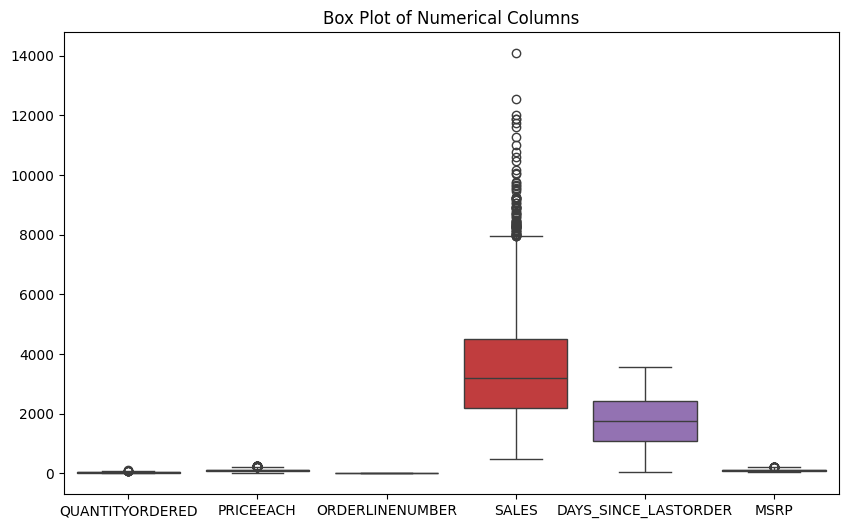

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train[numerical_columns])
plt.title('Box Plot of Numerical Columns')

From the Box plot it is seen that there are a lot of outliers in sales therefore we need to remove it

In [59]:
Q1 = train['SALES'].quantile(0.25)
Q3 = train['SALES'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = train[(train['SALES'] >= lower_bound) & (train['SALES'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot of Numerical Columns')

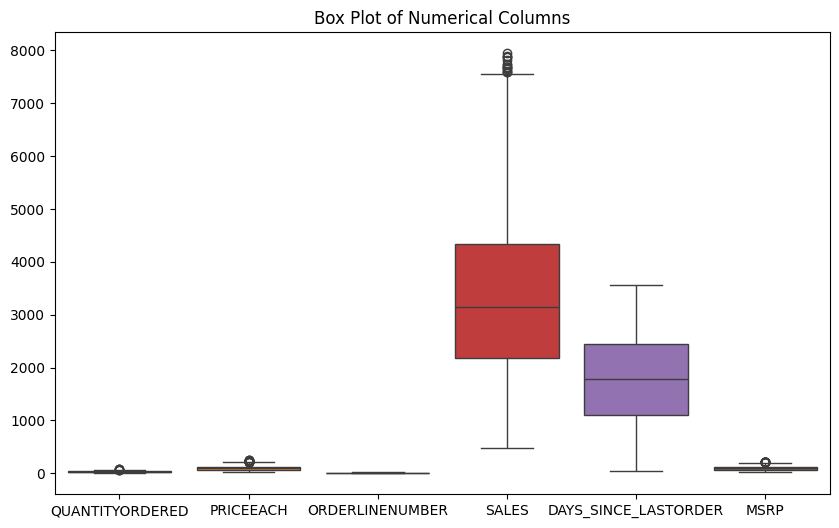

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[numerical_columns])
plt.title('Box Plot of Numerical Columns')

In [61]:
df_clean.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [62]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_clean['STATUS'], df_clean['PRODUCTLINE'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(chi2)
print(p)

146.20152669636715
3.1470218428795765e-17


Therefore no significant correlation between status and product line


In [63]:
contingency_table = pd.crosstab(df_clean['CITY'], df_clean['PRODUCTLINE'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(chi2)
print(p)

1985.561418269313
3.8309843842505204e-201


No significant relation between city and productline

In [64]:
contingency_table = pd.crosstab(df_clean['COUNTRY'], df_clean['PRODUCTLINE'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(chi2)
print(p)

524.9559229449876
4.849563221512919e-56


Country and product line also not correlated

In [65]:
df=df_clean

In [66]:
from scipy.stats import ttest_ind
group1 = df[df['DEALSIZE'] == 'Small']['SALES']
group2 = df[df['DEALSIZE'] == 'Large']['SALES']

In [67]:
group1

,SALES
0,2871.00
1,2765.90
5,2497.77
9,2333.12
14,2597.39
...,...
2737,1921.92
2738,2082.85
2739,2227.60
2742,2244.40


In [69]:
t_stat, p_val = ttest_ind(group1, group2)
p_val

0.0

There is a significant difference in SALES between Small and Large deal sizes

In [74]:
from statsmodels.stats.weightstats import ztest
z_stat, p_val = ztest(group1, group2)
p_val

0.0

There is a significant difference in SALES between the two deal sizes

In [75]:
from scipy.stats import f_oneway
group1 = df[df['DEALSIZE'] == 'Small']['SALES']
group2 = df[df['DEALSIZE'] == 'Medium']['SALES']
group3 = df[df['DEALSIZE'] == 'Large']['SALES']
f_stat, p_val = f_oneway(group1, group2, group3)
p_val

0.0

There is a significant difference in SALES across the deal sizes.

In [77]:
df[num_column].head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
0,10107,30,95.70,2,2871.00,828,95
1,10121,34,81.35,5,2765.90,757,95
2,10134,41,94.74,2,3884.34,703,95
3,10145,45,83.26,6,3746.70,649,95
4,10168,36,96.66,1,3479.76,586,95


For univariate analysis-

In [78]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2668.000000,2668.000000,2668.000000,2668.00000,2668.000000,2668.000000,2668.000000
mean,10259.170540,34.694903,98.407984,6.52024,3387.297028,1779.918291,98.928786
std,91.447284,9.441860,39.232137,4.23618,1574.919766,812.981893,38.542914
min,10100.000000,6.000000,26.880000,1.00000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,67.925000,3.00000,2180.385000,1112.500000,68.000000
50%,10263.000000,34.000000,94.100000,6.00000,3141.980000,1786.500000,97.000000
75%,10332.000000,42.000000,123.290000,10.00000,4342.057500,2453.250000,122.000000
max,10425.000000,85.000000,248.590000,18.00000,7947.310000,3562.000000,214.000000


In [79]:
df.describe(include='object')

,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2668,2668,2668,2668,2668,2668,2668,2668,2668,2668,2668,2668,2668
unique,246,6,7,109,89,88,89,71,73,19,76,72,3
top,14/11/2018,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,USA,Freyre,Diego,Medium
freq,38,2469,902,43,253,253,253,296,253,901,253,253,1349


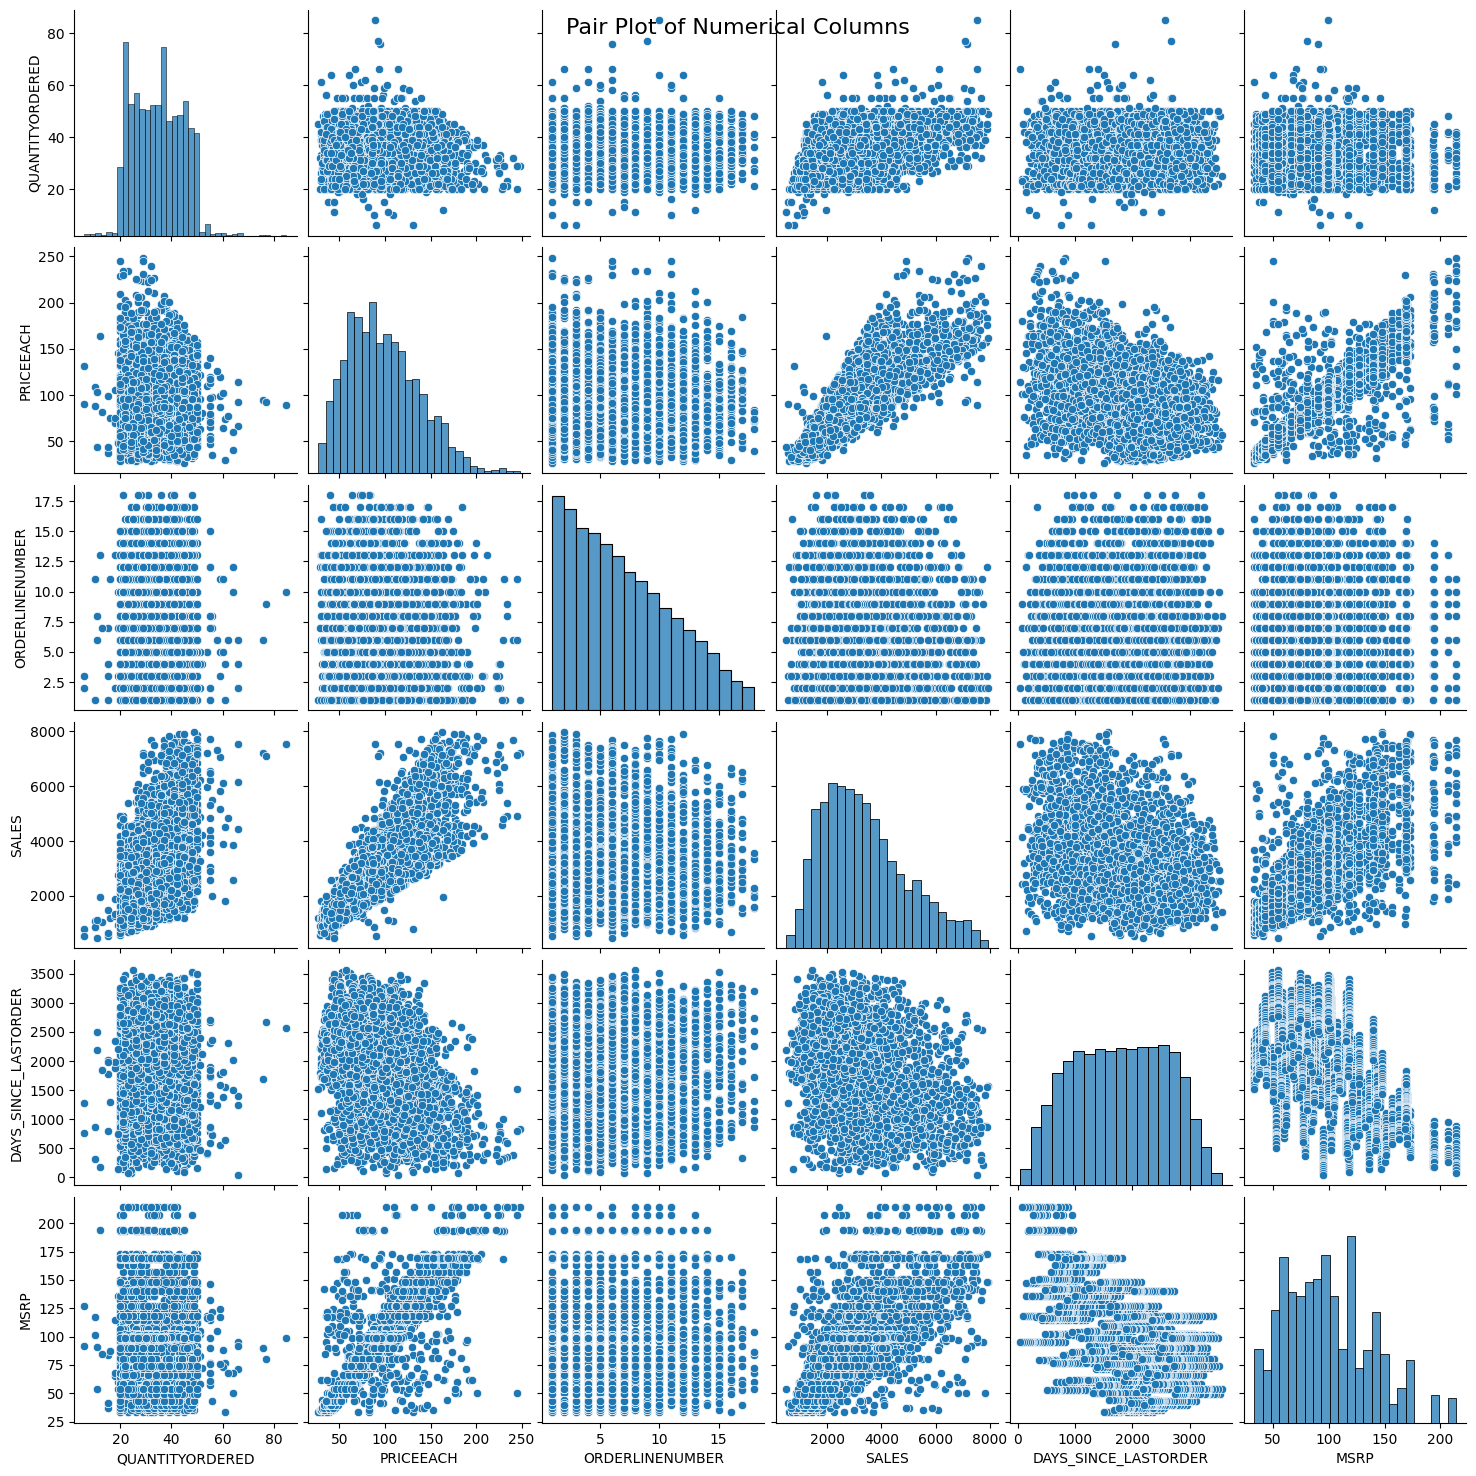

In [81]:

sns.pairplot(df[['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']])
plt.suptitle('Pair Plot of Numerical Columns', size=16)
plt.show()


In [82]:
df['SALES_PER_UNIT'] = df['SALES'] / df['QUANTITYORDERED']
df["SALES_PER_UNIT"]

<ipython-input-82-eaaf919d1e84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALES_PER_UNIT'] = df['SALES'] / df['QUANTITYORDERED']


,SALES_PER_UNIT
0,95.70
1,81.35
2,94.74
3,83.26
4,96.66
...,...
2742,112.22
2743,137.19
2744,125.99
2745,62.24


In [83]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
most_recent_order = df['ORDERDATE'].max()
df['ORDER_RECENCY'] = (most_recent_order - df['ORDERDATE']).dt.days


<ipython-input-83-bbb526b327db>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
<ipython-input-83-bbb526b327db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
<ipython-input-83-bbb526b327db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORDER_RECENCY'] = (most_recent_order - df['ORDER

In [85]:
df["ORDER_RECENCY"]

,ORDER_RECENCY
0,827
1,755
2,700
3,645
4,581
...,...
2742,181
2743,121
2744,91
2745,64


DEALSIZE    Large  Medium  Small
STATUS                          
Cancelled       0      33     27
Disputed        2       5      4
In Process      1      18     20
On Hold         4      24     15
Resolved        0      26     20
Shipped        66    1243   1160


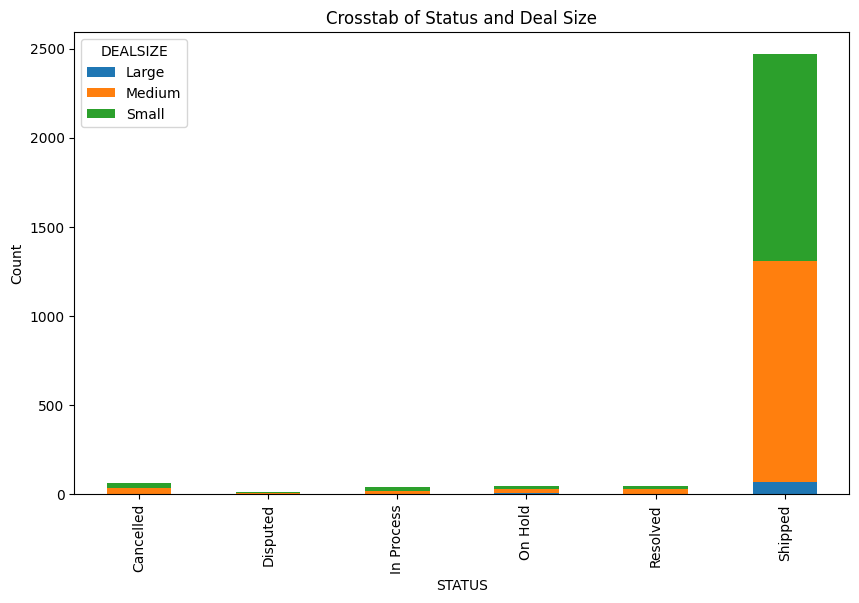

In [86]:
cross_tab = pd.crosstab(df['STATUS'], df['DEALSIZE'])
print(cross_tab)

cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Crosstab of Status and Deal Size')
plt.ylabel('Count')
plt.show()


In [87]:
print("Skewness:\n", df[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'DAYS_SINCE_LASTORDER']].skew())


Skewness:
 SALES                   0.659048
QUANTITYORDERED         0.227339
PRICEEACH               0.594901
DAYS_SINCE_LASTORDER   -0.023062
dtype: float64
